In [1]:
from mesa.visualization import (
    Slider,
    SolaraViz,
    make_plot_component,
    make_space_component,
)
import importlib
import numpy as np
from mesa.experimental import SolaraViz
from mesa.space import NetworkGrid

from scripts.agents.orders import Order
from scripts.agents.riders import Rider
from scripts import delivering
from animation.utils import agent_portrayal, Graph

In [2]:
np.random.seed(19)
num_riders = 2
max_t = 30
num_orders = 2

orders = [
    Order(
        id=i,
        creation_at=0,#(i+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, i*2),
    )
    for i in range(num_orders)
]

riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }


In [3]:
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_delivered_cum,orders_created,orders_assigned,orders_delivered,orders_waiting_cum,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum
0,1,1,0,0,0,2,2,0,0,NaN,NaN,2.0,NaN,2,0
1,1,1,0,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
2,1,1,0,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
3,1,1,0,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
4,1,1,0,0,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
5,0,1,0,1,0,0,0,0,0,NaN,NaN,2.0,NaN,2,0
6,0,0,1,1,0,0,0,0,0,NaN,NaN,NaN,2.0,2,2
7,0,0,1,1,1,0,0,1,0,7.0,7.0,NaN,1.0,2,2
8,0,0,1,1,1,0,0,0,0,NaN,7.0,NaN,1.0,2,2
9,0,0,1,1,1,0,0,0,0,NaN,7.0,NaN,1.0,2,2


<Axes: >

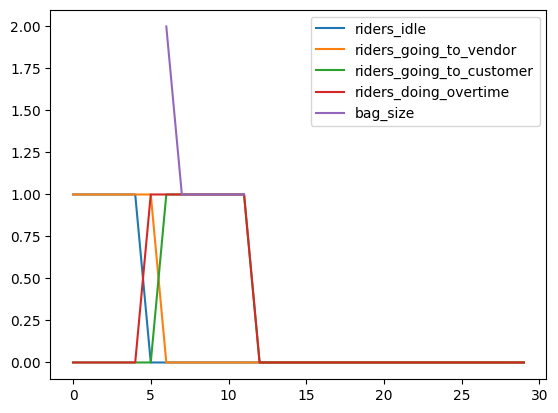

In [4]:
display(df)
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_delivered_cum,orders_created,orders_assigned,orders_delivered,orders_waiting_cum,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum
0,10,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0
1,7,3,0,0,0,5,5,0,0,NaN,NaN,1.666667,NaN,5,0
2,5,5,0,0,0,5,5,0,0,NaN,NaN,2.000000,NaN,10,0


<Axes: >

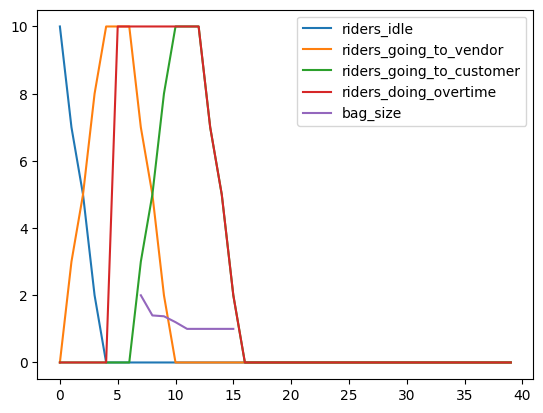

In [5]:
np.random.seed(19)
num_riders = 10
max_t = 40
num_orders = 50

orders = [
    Order(
        id=i,
        creation_at=(i//5+1)*1,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
    )
    for i in range(num_orders)
]
riders = [ 
    Rider(
        id=1, 
        shift_start_at=0, 
        shift_end_at=5,
        starting_point=(0,0)
        )
        for _ in range(num_riders)
        ]

model_params={
        "bag_limit": 2,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
display(df[:3])
df[[c for c in df.columns if "rider" in c or "bag" in c]].plot()

<Axes: >

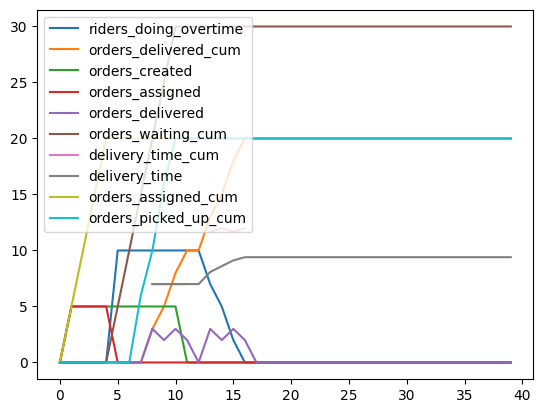

In [6]:
df[[c for c in df.columns if "orders" in c or "time" in c]].plot()

In [7]:
viz = SolaraViz(
    model_class=delivering.Dispatcher,
    #components=[Graph],
    model_params=model_params,
    name="Dispatcher",
    play_interval=10,
    agent_portrayal=agent_portrayal,
    measures=["delivery_time", "orders_assigned", "bag_size", "queue_size", "riders_idle", "riders_going_to_vendor", "orders_picked_up", "orders_delivered"],
  
)

viz

Component react.component(mesa.experimental.components.matplotlib.PlotMatplotlib) raised exception KeyError('orders_picked_up')
Traceback (most recent call last):
  File "/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'orders_picked_up'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/reacton/core.py", line 1707, in _render
  

Cannot show ipywidgets in text

Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!
Max simulation steps reached!


/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/gaby/Github/simulations/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,riders_idle,riders_going_to_vendor,riders_going_to_customer,riders_doing_overtime,orders_delivered_cum,orders_created,orders_assigned,orders_delivered,orders_waiting_cum,delivery_time_cum,delivery_time,queue_size,bag_size,orders_assigned_cum,orders_picked_up_cum
0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0
1,0,3,0,0,0,20,15,0,5,NaN,NaN,5.0,NaN,15,0
2,0,8,0,0,0,40,25,0,20,NaN,NaN,5.0,NaN,40,0
3,0,16,0,0,0,100,40,0,80,NaN,NaN,5.0,NaN,80,0
4,0,26,0,0,0,110,50,0,140,NaN,NaN,5.0,NaN,130,0
5,4,72,0,0,0,90,230,0,0,NaN,NaN,5.0,NaN,360,0
6,4,82,0,0,0,50,50,0,0,NaN,NaN,5.0,NaN,410,0
7,9,79,3,0,0,0,0,0,0,NaN,NaN,5.0,5.000000,410,15
8,6,74,8,0,3,0,0,3,0,7.000000,7.000000,5.0,4.625000,410,40
9,4,70,12,0,8,0,0,5,0,7.200000,7.125000,5.0,4.333333,410,60


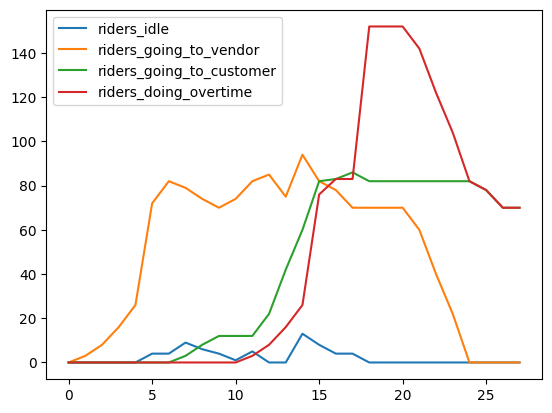

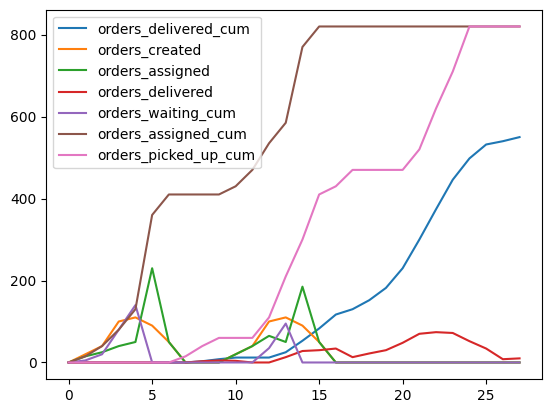

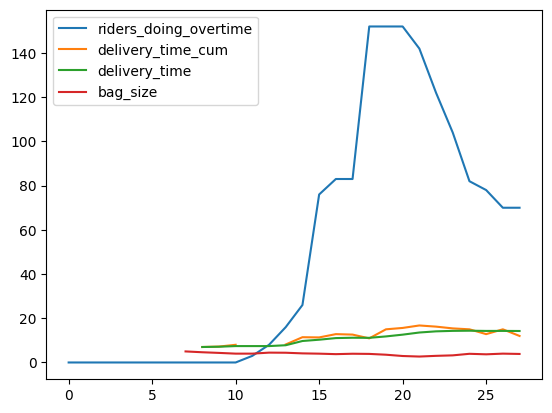

In [8]:
importlib.reload(delivering)

np.random.seed(19)

# TODO do a function to convert a list of quantities of orders into orders ->
# for each i, will create as many orders as are in the list[i]

_orders = [0, 20, 40, 100, 110, 90, 50, 0, 0]*2
_riders = [0, 3, 5, 8, 10, 50, 10, 5, 0]*2
max_t = len(_orders)



orders = [
    Order(
        id=sum(_orders[:t])+i,
        creation_at=t,
        restaurant_address=(3, 3),
        customer_address=(0, 2),
        preparation_time=q/10,
    )
    for t, q in enumerate(_orders) 
    for i in range(q)
]
riders = [ 
    Rider(
        id=i, 
        shift_start_at=t, 
        shift_end_at=min(t+10, max_t),
        starting_point=(0,0)
    )
    for t, q in enumerate(_riders) 
    for i in range(q)
        ]

model_params={
        "bag_limit": 5,
        "max_t": max_t,
        "dim": 10,
        "orders": orders,
        "riders":riders,
        "slowness": 1 # Slider(
    #     "Slowness", value=10, min=1, max=20, step=1
    # ),
    }
model= delivering.Dispatcher(**model_params)
for i in range(max_t+10):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
df[[c for c in df.columns if "rider" in c  ]].plot()
df[[c for c in df.columns if "orders" in c ]].plot()
df[[c for c in df.columns if "time" in c or "bag" in c]].plot()
display(df[:20])



In [9]:
df[:20].columns



Index(['riders_idle', 'riders_going_to_vendor', 'riders_going_to_customer',
       'riders_doing_overtime', 'orders_delivered_cum', 'orders_created',
       'orders_assigned', 'orders_delivered', 'orders_waiting_cum',
       'delivery_time_cum', 'delivery_time', 'queue_size', 'bag_size',
       'orders_assigned_cum', 'orders_picked_up_cum'],
      dtype='object')

In [10]:
]

SyntaxError: unmatched ']' (1890416573.py, line 1)